In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.uint8([[1, 1, 1, 1, 0],
                [0, 0, 1, 1, 0],
                [0, 0, 1, 1, 1],
                [0, 1, 1, 0, 0]])

ker = np.uint8([[1,0,1],
                [0,1,0],
                [1,0,1]])

res = cv2.filter2D(img, 0, ker)
print(res)

[[1 3 3 3 4]
 [2 3 4 4 4]
 [2 2 3 3 3]
 [0 3 3 4 4]]


In [17]:
ksize = 3
ker = np.ones((ksize,ksize),np.uint8)/(ksize*ksize)
print(ker)

url = 'dataset/colorobject.png'
img = cv2.imread(url)
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


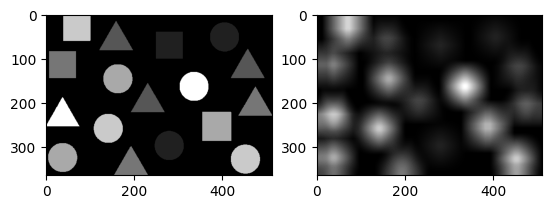

In [18]:
#Average filter
ksize = 55
ker = np.ones((ksize,ksize),np.uint8)/(ksize*ksize)
#print ker
res = cv2.filter2D(gray,0,ker)
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(res, cmap='gray')

[[1.09908987e-22]
 [6.33990067e-17]
 [4.75134356e-12]
 [4.62631442e-08]
 [5.85246180e-05]
 [9.61892992e-03]
 [2.05399634e-01]
 [5.69845731e-01]
 [2.05399634e-01]
 [9.61892992e-03]
 [5.85246180e-05]
 [4.62631442e-08]
 [4.75134356e-12]
 [6.33990067e-17]
 [1.09908987e-22]]
[[1.09908987e-22 6.33990067e-17 4.75134356e-12 4.62631442e-08
  5.85246180e-05 9.61892992e-03 2.05399634e-01 5.69845731e-01
  2.05399634e-01 9.61892992e-03 5.85246180e-05 4.62631442e-08
  4.75134356e-12 6.33990067e-17 1.09908987e-22]]


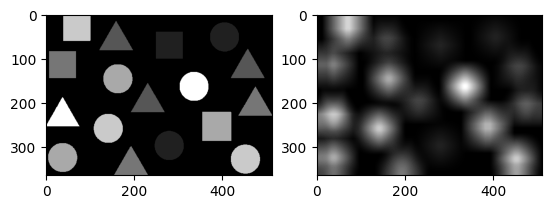

In [19]:
#Q1
#Guasian filter
ksize = 15
sigma =0.7
gX = cv2.getGaussianKernel(ksize,sigma)
gY = np.transpose(gX)
print(gX)
print(gY)
gKernel = gX*gY

#print(gkernel)

res2 =cv2.filter2D(gray,0,gKernel)

plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(res, cmap='gray')

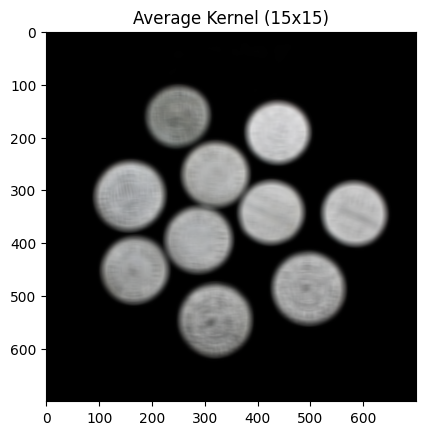

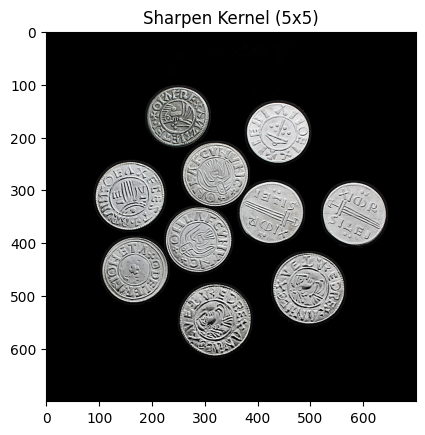

In [20]:
#Q2
import cv2
import matplotlib.pyplot as plt
import numpy as np

url = 'dataset/coins.jpg'
img2 = cv2.imread(url)
rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

def apply_convolution(kernel, title):
    result = cv2.filter2D(rgb, -1, kernel)
    plt.imshow(result)
    plt.title(title)
    plt.show()

avg_kernel = np.ones((15, 15), np.float32) / 225
apply_convolution(avg_kernel, 'Average Kernel (15x15)')


sharpen_kernel = np.array([[1, 4, 6, 4, 1],
                           [4, 16, 24, 16, 4],
                           [6, 24, -476, 24, 6],
                           [4, 16, 24, 16, 4],
                           [1, 4, 6, 4, 1]]) * (-1/256)
apply_convolution(sharpen_kernel, 'Sharpen Kernel (5x5)')

# 2


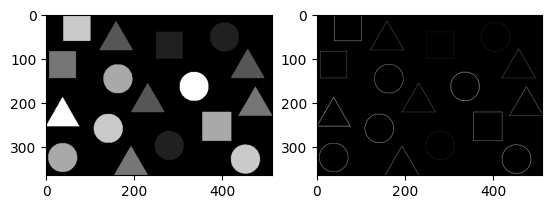

In [21]:
#laplacian
LKernel = np.float32([[0,-1,0],
                              [-1,4,-1],
                              [0,-1,0]])
res5 = cv2.filter2D(gray,0,LKernel)
plt.subplot(1,2,1)
plt.imshow(gray, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(res5, cmap='gray')

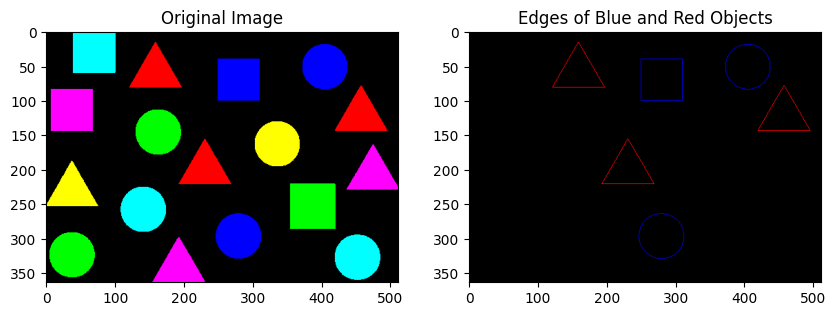

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('dataset/colorobject.png')

# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


#blue
blue_lower = np.array([100, 150, 50])
blue_upper = np.array([140, 255, 255])
#red
red_lower1 = np.array([0, 120, 70])
red_upper1 = np.array([10, 255, 255])
red_lower2 = np.array([170, 120, 70])
red_upper2 = np.array([180, 255, 255])

# Create masks for blue and red colors
mask_blue = cv2.inRange(hsv, blue_lower, blue_upper)
mask_red = cv2.inRange(hsv, red_lower1, red_upper1) | cv2.inRange(hsv, red_lower2, red_upper2)

# Combine the blue and red masks
mask_combined = cv2.bitwise_or(mask_blue, mask_red)

LKernel = np.float32([[0, -1, 0],
                      [-1, 4, -1],
                      [0, -1, 0]])
edges = cv2.filter2D(img, -1, LKernel)

# Keep only the edges that correspond to the blue and red objects
edges_colored = cv2.bitwise_and(edges, edges, mask=mask_combined)

# Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(edges_colored, cv2.COLOR_BGR2RGB))
plt.title('Edges of Blue and Red Objects')

plt.show()


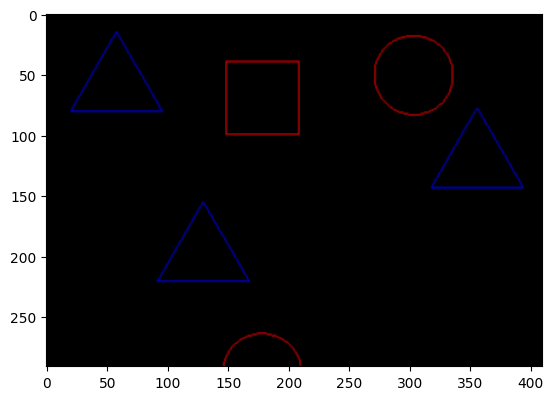

In [23]:
#crop edges_colored crop 80 percent
x = 100
y = 0
h = 291
w = 410

crop = cv2.getRectSubPix(edges_colored,(w,h),(x+(w/2),y+(h/2)))
plt.imshow(crop)

(364, 512, 3)


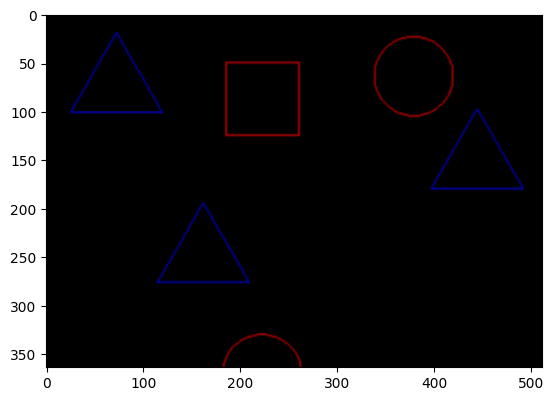

In [24]:
#resize back to 100
crop2 = cv2.resize(crop,(512,364))
print(crop2.shape)
plt.imshow(crop2)